In [ ]:
! pip install gensim

# import data

In [2]:
import pandas as pd
import re

In [7]:
#math_post = pd.read_csv("../data/csv/math_post.csv", lineterminator='\n')
chemistry_post = pd.read_csv("../data/csv/chemistry_post.csv", lineterminator='\n')
physics_post = pd.read_csv("../data/csv/physics_post.csv", lineterminator='\n')
biology_post = pd.read_csv("../data/csv/biology_post.csv", lineterminator='\n')

/Users/shuang/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
biology_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48853 entries, 0 to 48852
Data columns (total 21 columns):
AcceptedAnswerId         9894 non-null float64
AnswerCount              22002 non-null float64
Body                     48496 non-null object
ClosedDate               2318 non-null object
CommentCount             48853 non-null int64
CommunityOwnedDate       117 non-null object
CreationDate             48853 non-null object
FavoriteCount            7858 non-null float64
Id                       48853 non-null int64
LastActivityDate         48853 non-null object
LastEditDate             25464 non-null object
LastEditorDisplayName    562 non-null object
LastEditorUserId         24935 non-null float64
OwnerDisplayName         1187 non-null object
OwnerUserId              47835 non-null float64
ParentId                 25723 non-null float64
PostTypeId               48853 non-null int64
Score                    48853 non-null int64
Tags                     22002 non-null object
Titl

In [3]:
subject_string = ['math','chemistry', 'physics', 'biology']
post_df= [math_post, chemistry_post, physics_post, biology_post]

# generate index, text files

In [4]:
#generate csv with post id and text
for i in range(len(subject_string)):
    print("start processing posts for " + subject_string[i])
    subject_body = post_df[i][["Id", "Body"]]  
    subject_body['Label'] = subject_string[i]    
    print("start saving posts for " + subject_string[i])
    subject_body.to_csv("../data/csv/" + subject_string[i] + "_post_index_body.csv", index = False)

start processing posts for math


/Users/shuang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


start saving posts for math
start processing posts for chemistry
start saving posts for chemistry
start processing posts for physics
start saving posts for physics
start processing posts for biology
start saving posts for biology


# generate id, tag files

In [5]:
#generate csv with post id and tags
for i in range(len(subject_string)):
    print("start processing posts for " + subject_string[i])
    subject_tag = post_df[i][["Id", "Tags"]]  
    subject_tag['Label'] = subject_string[i]    
    print("start saving posts for " + subject_string[i])
    subject_tag.to_csv("../data/csv/" + subject_string[i] + "_post_index_tags.csv", index = False)

start processing posts for math


/Users/shuang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


start saving posts for math
start processing posts for chemistry
start saving posts for chemistry
start processing posts for physics
start saving posts for physics
start processing posts for biology
start saving posts for biology


# generate id, tag, body file

In [93]:
#generate csv with post id and tags
for i in range(len(subject_string)):
    print("start processing posts for " + subject_string[i])
    subject_tag = post_df[i][["Id", "Tags", "Body"]]  
    subject_tag['Label'] = subject_string[i]    
    print("start saving posts for " + subject_string[i])
    subject_tag.to_csv("../data/csv/" + subject_string[i] + "_post_id_tag_body.csv", index = False)

start processing posts for math


/Users/shuang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


start saving posts for math
start processing posts for chemistry
start saving posts for chemistry
start processing posts for physics
start saving posts for physics
start processing posts for biology
start saving posts for biology


In [ ]:
#generate csv with post id, tags and equation
for i in range(len(subject_string)):
    print("start processing posts for " + subject_string[i])
    subject_tag = post_df[i][["Id", "Tags", "Equation"]]  
    subject_tag['Label'] = subject_string[i]    
    print("start saving posts for " + subject_string[i])
    subject_tag.to_csv("../data/csv/" + subject_string[i] + "_post_id_tag_equation.csv", index = False)

# explore tag (biology) 

In [6]:
biology = pd.read_csv("../data/csv/biology_post_index_tags.csv", lineterminator='\n')
biology.head()

,Id,Tags,Label
0,1,<ribosome><binding-sites><translation><synthet...,biology
1,2,<rna><biochemistry>,biology
2,3,<immunology><cell-biology><hematology>,biology
3,4,<cell-culture>,biology
4,5,<splicing><mrna><spliceosome><introns><exons>,biology


In [7]:
biology.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48853 entries, 0 to 48852
Data columns (total 3 columns):
Id       48853 non-null int64
Tags     22002 non-null object
Label    48853 non-null object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


## drop nan values

In [8]:
biology.dropna(inplace = True)
biology.reset_index(drop = True, inplace = True)

## calculate tag frequency 

In [10]:
tag_freq = biology.groupby(['Tags'])['Tags'].count().rename('Tag_freq').sort_values(ascending = False).reset_index()
tag_freq

,Tags,Tag_freq
0,<species-identification><entomology>,272
1,<genetics>,260
2,<human-biology>,255
3,<evolution>,254
4,<species-identification>,175
5,<biochemistry>,156
6,<cell-biology>,130
7,<zoology>,121
8,<botany>,111
9,<molecular-biology>,111


## filter all the tag combination 

In [12]:
pattern = re.compile("<(.+?)>")

In [19]:
tag_freq['Tag_list'] = tag_freq.apply(lambda row: set(re.findall(pattern, row.Tags)), axis=1)

In [20]:
tag_freq.head()

,Tags,Tag_freq,Tag_list
0,<species-identification><entomology>,272,"[species-identification, entomology]"
1,<genetics>,260,[genetics]
2,<human-biology>,255,[human-biology]
3,<evolution>,254,[evolution]
4,<species-identification>,175,[species-identification]


In [81]:
filter_tag = tag_freq[tag_freq.apply(lambda row: len(row.Tag_list) > 1, axis=1)]
filter_tag

,Tags,Tag_freq,Tag_list
0,<species-identification><entomology>,272,"[species-identification, entomology]"
14,<botany><species-identification>,93,"[botany, species-identification]"
16,<species-identification><botany>,82,"[botany, species-identification]"
18,<species-identification><ornithology>,64,"[species-identification, ornithology]"
19,<entomology><species-identification>,57,"[entomology, species-identification]"
20,<species-identification><arachnology>,56,"[species-identification, arachnology]"
22,<species-identification><zoology><entomology>,53,"[species-identification, zoology, entomology]"
23,<botany><plant-physiology>,52,"[botany, plant-physiology]"
25,<neuroscience><neurophysiology>,44,"[neuroscience, neurophysiology]"
32,<human-biology><human-anatomy>,36,"[human-biology, human-anatomy]"


## notice there are some combinations with same value but different orders, try to merge them

In [82]:
filter_tag['Tag_list'] = filter_tag.apply(lambda row: sorted(row['Tag_list']), axis = 1)

/Users/shuang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [83]:
filter_tag.head(10)

,Tags,Tag_freq,Tag_list
0,<species-identification><entomology>,272,"[entomology, species-identification]"
14,<botany><species-identification>,93,"[botany, species-identification]"
16,<species-identification><botany>,82,"[botany, species-identification]"
18,<species-identification><ornithology>,64,"[ornithology, species-identification]"
19,<entomology><species-identification>,57,"[entomology, species-identification]"
20,<species-identification><arachnology>,56,"[arachnology, species-identification]"
22,<species-identification><zoology><entomology>,53,"[entomology, species-identification, zoology]"
23,<botany><plant-physiology>,52,"[botany, plant-physiology]"
25,<neuroscience><neurophysiology>,44,"[neurophysiology, neuroscience]"
32,<human-biology><human-anatomy>,36,"[human-anatomy, human-biology]"


In [84]:
filter_tag.groupby(['Tag_freq'])['Tag_freq'].count()

Tag_freq
1      10835
2        887
3        255
4        120
5         67
6         61
7         30
8         25
9         24
10        12
11        12
12        12
13         4
14         3
15         4
16         3
17         4
18         5
19         2
20         6
21         1
22         3
23         2
24         3
25         1
26         2
28         3
29         1
30         1
36         1
44         1
52         1
53         1
56         1
57         1
64         1
82         1
93         1
272        1
Name: Tag_freq, dtype: int64

In [85]:
filter_tag_5 = filter_tag[filter_tag.apply(lambda row: row.Tag_freq >= 5, axis=1)][['Tag_freq', 'Tag_list']]
filter_tag_5.reset_index(drop = True, inplace = True)
filter_tag_5.head()


,Tag_freq,Tag_list
0,272,"[entomology, species-identification]"
1,93,"[botany, species-identification]"
2,82,"[botany, species-identification]"
3,64,"[ornithology, species-identification]"
4,57,"[entomology, species-identification]"


In [86]:
filter_tag_5['Tags'] = filter_tag_5.apply(lambda row: ', '.join(row.Tag_list), axis=1)
filter_tag_5.head()

,Tag_freq,Tag_list,Tags
0,272,"[entomology, species-identification]","entomology, species-identification"
1,93,"[botany, species-identification]","botany, species-identification"
2,82,"[botany, species-identification]","botany, species-identification"
3,64,"[ornithology, species-identification]","ornithology, species-identification"
4,57,"[entomology, species-identification]","entomology, species-identification"


In [87]:
filter_tag_5.groupby(['Tags'])['Tag_freq'].sum().sort_values(ascending = False).reset_index()


,Tags,Tag_freq
0,"entomology, species-identification",329
1,"botany, species-identification",175
2,"entomology, species-identification, zoology",81
3,"ornithology, species-identification",64
4,"arachnology, species-identification",56
5,"botany, plant-physiology",52
6,"neurophysiology, neuroscience",44
7,"species-identification, zoology",39
8,"human-anatomy, human-biology",36
9,"botany, species-identification, trees",35


## find the most frequency tag

In [64]:
def tag_regex(subject):
    subj_dict = {}
    pattern = re.compile("<(.+?)>")
    for text in subject["Tags"]:
        tags = re.findall(pattern, text)
        for tag in tags:
                if tag not in subj_dict:
                    subj_dict[tag] = 1
                else:
                    subj_dict[tag] += 1
    return subj_dict

In [67]:
import operator
tag_dict = tag_regex(biology)
sorted_tag = sorted(tag_dict.items(), key=operator.itemgetter(1), reverse = True)
sorted_tag

[('human-biology', 2170),
 ('genetics', 1949),
 ('evolution', 1816),
 ('biochemistry', 1609),
 ('species-identification', 1560),
 ('molecular-biology', 1375),
 ('cell-biology', 1294),
 ('botany', 1117),
 ('zoology', 1100),
 ('neuroscience', 1099),
 ('dna', 1039),
 ('entomology', 952),
 ('bioinformatics', 870),
 ('physiology', 790),
 ('microbiology', 736),
 ('proteins', 708),
 ('immunology', 516),
 ('molecular-genetics', 512),
 ('bacteriology', 503),
 ('homework', 500),
 ('human-anatomy', 456),
 ('ecology', 423),
 ('metabolism', 422),
 ('brain', 421),
 ('plant-physiology', 411),
 ('neurophysiology', 395),
 ('terminology', 390),
 ('reproduction', 361),
 ('human-genetics', 356),
 ('cancer', 349),
 ('pharmacology', 329),
 ('pathology', 321),
 ('lab-techniques', 308),
 ('dna-sequencing', 301),
 ('gene-expression', 297),
 ('enzymes', 289),
 ('population-genetics', 288),
 ('food', 281),
 ('human-physiology', 278),
 ('rna', 274),
 ('ornithology', 264),
 ('photosynthesis', 255),
 ('hematology',

# word2vec similarity test (chemistry)

In [199]:
chemistry = pd.read_csv("../data/equation/chemistry_post_eq_filtered_id.csv", lineterminator='\n')
chemistry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199528 entries, 0 to 199527
Data columns (total 4 columns):
Equation    199494 non-null object
Label       199528 non-null object
Id          199528 non-null int64
Tags        65080 non-null object
dtypes: int64(1), object(3)
memory usage: 6.1+ MB


In [200]:
chemistry.dropna(inplace = True)

In [201]:
chemistry['Equation'] = chemistry['Equation'].astype(str)

# explore the equation length
### notice there may be some unexpected spaces in equation, we need to remove the space

In [202]:
chemistry['Equation'] = chemistry.apply(lambda row: row['Equation'].replace(" ",""), axis = 1)

In [203]:
chemistry['Equation_len'] = chemistry.apply(lambda row: len(row.Equation), axis=1)
chemistry.head()

,Equation,Label,Id,Tags,Equation_len
0,\mathrm{NaCl},chemistry,2,<ions><crystal-structure><ionic-compounds><sol...,13
1,\mathrm{Cl},chemistry,2,<ions><crystal-structure><ionic-compounds><sol...,11
2,\mathrm{Cl^-},chemistry,2,<ions><crystal-structure><ionic-compounds><sol...,13
3,\mathrm{Na},chemistry,2,<ions><crystal-structure><ionic-compounds><sol...,11
4,\mathrm{Na^+},chemistry,2,<ions><crystal-structure><ionic-compounds><sol...,13


In [180]:
%matplotlib inline

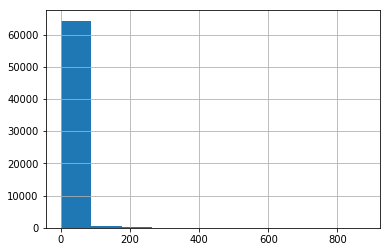

In [204]:
chemistry['Equation_len'].hist(bins=10)

In [205]:
chemistry['Equation_len'].describe()

count    65073.000000
mean        15.232185
std         19.820435
min          0.000000
25%          7.000000
50%         10.000000
75%         16.000000
max        880.000000
Name: Equation_len, dtype: float64

In [206]:
chemistry[chemistry['Equation_len'] < 20]['Equation_len'].describe()

count    52389.000000
mean         8.691977
std          4.332977
min          0.000000
25%          6.000000
50%          8.000000
75%         11.000000
max         19.000000
Name: Equation_len, dtype: float64

# filter the equation with the reasonable length range

In [207]:
chemistry_filter = chemistry[chemistry.apply(lambda row: (row.Equation_len > 3) & (row.Equation_len < 15) , axis=1)]
chemistry_filter.reset_index(drop = True, inplace = True)
chemistry_filter.head()

,Equation,Label,Id,Tags,Equation_len
0,\mathrm{NaCl},chemistry,2,<ions><crystal-structure><ionic-compounds><sol...,13
1,\mathrm{Cl},chemistry,2,<ions><crystal-structure><ionic-compounds><sol...,11
2,\mathrm{Cl^-},chemistry,2,<ions><crystal-structure><ionic-compounds><sol...,13
3,\mathrm{Na},chemistry,2,<ions><crystal-structure><ionic-compounds><sol...,11
4,\mathrm{Na^+},chemistry,2,<ions><crystal-structure><ionic-compounds><sol...,13


# use word2vect to checkt the similarity between each equation pair (use tags and equation as the content)

In [208]:
chemistry_filter['Tags'] = chemistry_filter['Tags'].astype(str)
pattern = re.compile("<(.+?)>")
chemistry_filter['Tag_list'] = chemistry_filter.apply(lambda row: re.findall(pattern, row.Tags), axis=1)
chemistry_filter.head()

/Users/shuang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/shuang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Equation,Label,Id,Tags,Equation_len,Tag_list
0,\mathrm{NaCl},chemistry,2,<ions><crystal-structure><ionic-compounds><sol...,13,"[ions, crystal-structure, ionic-compounds, sol..."
1,\mathrm{Cl},chemistry,2,<ions><crystal-structure><ionic-compounds><sol...,11,"[ions, crystal-structure, ionic-compounds, sol..."
2,\mathrm{Cl^-},chemistry,2,<ions><crystal-structure><ionic-compounds><sol...,13,"[ions, crystal-structure, ionic-compounds, sol..."
3,\mathrm{Na},chemistry,2,<ions><crystal-structure><ionic-compounds><sol...,11,"[ions, crystal-structure, ionic-compounds, sol..."
4,\mathrm{Na^+},chemistry,2,<ions><crystal-structure><ionic-compounds><sol...,13,"[ions, crystal-structure, ionic-compounds, sol..."


In [209]:
chemistry_filter['Tag_equation'] = chemistry_filter.apply(lambda row: row.Tag_list.append(row.Equation), axis = 1)
chemistry_filter.head()


/Users/shuang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Equation,Label,Id,Tags,Equation_len,Tag_list,Tag_equation
0,\mathrm{NaCl},chemistry,2,<ions><crystal-structure><ionic-compounds><sol...,13,"[ions, crystal-structure, ionic-compounds, sol...",None
1,\mathrm{Cl},chemistry,2,<ions><crystal-structure><ionic-compounds><sol...,11,"[ions, crystal-structure, ionic-compounds, sol...",None
2,\mathrm{Cl^-},chemistry,2,<ions><crystal-structure><ionic-compounds><sol...,13,"[ions, crystal-structure, ionic-compounds, sol...",None
3,\mathrm{Na},chemistry,2,<ions><crystal-structure><ionic-compounds><sol...,11,"[ions, crystal-structure, ionic-compounds, sol...",None
4,\mathrm{Na^+},chemistry,2,<ions><crystal-structure><ionic-compounds><sol...,13,"[ions, crystal-structure, ionic-compounds, sol...",None


In [211]:
chemistry_filter.drop(['Tag_equation'], axis = 1, inplace = True)

/Users/shuang/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [212]:
chemistry_filter.iloc[0].Tag_list

['ions',
 'crystal-structure',
 'ionic-compounds',
 'solid-state-chemistry',
 '\\mathrm{NaCl}']

In [213]:
chemistry_filter['Tag_str'] = chemistry_filter.apply(lambda row: ','.join(row.Tag_list), axis = 1)
chemistry_filter

/Users/shuang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Equation,Label,Id,Tags,Equation_len,Tag_list,Tag_str
0,\mathrm{NaCl},chemistry,2,<ions><crystal-structure><ionic-compounds><sol...,13,"[ions, crystal-structure, ionic-compounds, sol...","ions,crystal-structure,ionic-compounds,solid-s..."
1,\mathrm{Cl},chemistry,2,<ions><crystal-structure><ionic-compounds><sol...,11,"[ions, crystal-structure, ionic-compounds, sol...","ions,crystal-structure,ionic-compounds,solid-s..."
2,\mathrm{Cl^-},chemistry,2,<ions><crystal-structure><ionic-compounds><sol...,13,"[ions, crystal-structure, ionic-compounds, sol...","ions,crystal-structure,ionic-compounds,solid-s..."
3,\mathrm{Na},chemistry,2,<ions><crystal-structure><ionic-compounds><sol...,11,"[ions, crystal-structure, ionic-compounds, sol...","ions,crystal-structure,ionic-compounds,solid-s..."
4,\mathrm{Na^+},chemistry,2,<ions><crystal-structure><ionic-compounds><sol...,13,"[ions, crystal-structure, ionic-compounds, sol...","ions,crystal-structure,ionic-compounds,solid-s..."
5,",where",chemistry,4,<equilibrium><free-energy>,6,"[equilibrium, free-energy, ,where]","equilibrium,free-energy,,where"
6,\DeltaG=0,chemistry,4,<equilibrium><free-energy>,9,"[equilibrium, free-energy, \DeltaG=0]","equilibrium,free-energy,\DeltaG=0"
7,\DeltaG&lt;0,chemistry,4,<equilibrium><free-energy>,12,"[equilibrium, free-energy, \DeltaG&lt;0]","equilibrium,free-energy,\DeltaG&lt;0"
8,\ce{H2SO4},chemistry,7,<organic-chemistry><aromatic-compounds><nitro-...,10,"[organic-chemistry, aromatic-compounds, nitro-...","organic-chemistry,aromatic-compounds,nitro-com..."
9,\ce{HNO3},chemistry,7,<organic-chemistry><aromatic-compounds><nitro-...,9,"[organic-chemistry, aromatic-compounds, nitro-...","organic-chemistry,aromatic-compounds,nitro-com..."


In [214]:
chemistry_filter.drop_duplicates('Tag_str', keep = 'first', inplace = True) 

/Users/shuang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [215]:
tag_list= [row.split(',') for row in chemistry_filter['Tag_str']]

In [216]:
tag_list

[['ions',
  'crystal-structure',
  'ionic-compounds',
  'solid-state-chemistry',
  '\\mathrm{NaCl}'],
 ['ions',
  'crystal-structure',
  'ionic-compounds',
  'solid-state-chemistry',
  '\\mathrm{Cl}'],
 ['ions',
  'crystal-structure',
  'ionic-compounds',
  'solid-state-chemistry',
  '\\mathrm{Cl^-}'],
 ['ions',
  'crystal-structure',
  'ionic-compounds',
  'solid-state-chemistry',
  '\\mathrm{Na}'],
 ['ions',
  'crystal-structure',
  'ionic-compounds',
  'solid-state-chemistry',
  '\\mathrm{Na^+}'],
 ['equilibrium', 'free-energy', '', 'where'],
 ['equilibrium', 'free-energy', '\\DeltaG=0'],
 ['equilibrium', 'free-energy', '\\DeltaG&lt;0'],
 ['organic-chemistry', 'aromatic-compounds', 'nitro-compounds', '\\ce{H2SO4}'],
 ['organic-chemistry', 'aromatic-compounds', 'nitro-compounds', '\\ce{HNO3}'],
 ['organic-chemistry', 'aromatic-compounds', 'nitro-compounds', '\\ce{-NMe2}'],
 ['organic-chemistry', 'thermodynamics', '\\ce{C-P}'],
 ['organic-chemistry', 'thermodynamics', '\\ce{C-O-P}'],


In [217]:
len(tag_list)

26995

## CBOW model

In [233]:
import gensim 
from gensim.models import Word2Vec 

# Create CBOW model 
model1 = gensim.models.Word2Vec(tag_list, min_count = 1,  
                              size = 50, window = 5) 

In [224]:
model1.wv.vocab

{'ions': <gensim.models.keyedvectors.Vocab at 0x13217a860>,
 'crystal-structure': <gensim.models.keyedvectors.Vocab at 0x13217a940>,
 'ionic-compounds': <gensim.models.keyedvectors.Vocab at 0x13011b780>,
 'solid-state-chemistry': <gensim.models.keyedvectors.Vocab at 0x11c33ac50>,
 '\\mathrm{NaCl}': <gensim.models.keyedvectors.Vocab at 0x1255dde80>,
 '\\mathrm{Cl}': <gensim.models.keyedvectors.Vocab at 0x11c8d7d30>,
 '\\mathrm{Cl^-}': <gensim.models.keyedvectors.Vocab at 0x11c8d7c50>,
 '\\mathrm{Na}': <gensim.models.keyedvectors.Vocab at 0x11c8d7e48>,
 '\\mathrm{Na^+}': <gensim.models.keyedvectors.Vocab at 0x11c8d7630>,
 'equilibrium': <gensim.models.keyedvectors.Vocab at 0x11c8d7cc0>,
 'free-energy': <gensim.models.keyedvectors.Vocab at 0x11c8d7fd0>,
 '': <gensim.models.keyedvectors.Vocab at 0x11c8d7518>,
 'where': <gensim.models.keyedvectors.Vocab at 0x11c8d7668>,
 '\\DeltaG=0': <gensim.models.keyedvectors.Vocab at 0x11c8d7be0>,
 '\\DeltaG&lt;0': <gensim.models.keyedvectors.Vocab at 0

In [237]:
# Print results 
print("Cosine similarity between '\\ce{Cu^2+}' " + 
               "and 'E=mc^2' - CBOW : ", 
    model1.wv.similarity('\\ce{Cu^2+}', 'E=mc^2')) 

Cosine similarity between '\ce{Cu^2+}' and 'E=mc^2' - CBOW :  0.9011575


In [236]:
# Print results 
print("Cosine similarity between '\\ce{Cu^2+}' " + 
               "and '\\sigma' - CBOW : ", 
    model1.wv.similarity('\\ce{Cu^2+}', '\\sigma')) 

Cosine similarity between '\ce{Cu^2+}' and '\sigma' - CBOW :  0.72415555


In [235]:
# Print results 
print("Cosine similarity between '\\mu_i' " + 
               "and '\\eta^6' - CBOW : ", 
    model1.wv.similarity('\\mu_i', '\\eta^6')) 

Cosine similarity between '\mu_i' and '\eta^6' - CBOW :  0.8166431


In [238]:
# Print results 
print("Cosine similarity between '\\ce{V^{3+}}' " + 
               "and '\\ce{Xe}' - CBOW : ", 
    model1.wv.similarity('\\ce{V^{3+}}', '\\ce{Xe}')) 

Cosine similarity between '\ce{V^{3+}}' and '\ce{Xe}' - CBOW :  0.6749423


## skip gram model

In [239]:
# Create Skip Gram model 
model2 = gensim.models.Word2Vec(tag_list, min_count = 1, size = 50, 
                                             window = 5, sg = 1) 

In [240]:
print("Cosine similarity between '\\mathrm{Cl^-}' " + 
               "and '\\mathrm{Na}' - Skip Gram: ", 
    model2.wv.similarity('\\mathrm{Cl^-}', '\\mathrm{Na}'))

Cosine similarity between '\mathrm{Cl^-}' and '\mathrm{Na}' - Skip Gram:  0.9068579


In [241]:
print("Cosine similarity between '\\sim10' " + 
               "and '\\ce{C}^*' - Skip Gram: ", 
    model2.wv.similarity('\\sim10', '\\ce{C}^*'))

Cosine similarity between '\sim10' and '\ce{C}^*' - Skip Gram:  0.86712474


In [242]:
print("Cosine similarity between '\\ce{F-}' " + 
               "and '\\ce{C}^*' - Skip Gram: ", 
    model2.wv.similarity('\\ce{F-}', '\\ce{C}^*'))

Cosine similarity between '\ce{F-}' and '\ce{C}^*' - Skip Gram:  0.9470662


In [243]:
print("Cosine similarity between 'j_{m}' " + 
               "and '\\sigma' - Skip Gram: ", 
    model2.wv.similarity('j_{m}', '\\sigma'))

Cosine similarity between 'j_{m}' and '\sigma' - Skip Gram:  0.039963186


In [246]:
print("Cosine similarity between 'S_N2' " + 
               "and 'E=mc^2' - CBOW : ", 
    model2.wv.similarity('S_N2', 'E=mc^2')) 

Cosine similarity between 'S_N2' and 'E=mc^2' - CBOW :  0.8585063


In [247]:
print("Cosine similarity between 'S_N1' " + 
               "and 'S_N2' - CBOW : ", 
    model2.wv.similarity('S_N1', 'S_N2')) 

Cosine similarity between 'S_N1' and 'S_N2' - CBOW :  0.9855429


In [245]:
# Print results 
print("Cosine similarity between '\\ce{Cu^2+}' " + 
               "and '\\sigma' - CBOW : ", 
    model2.wv.similarity('\\ce{Cu^2+}', '\\sigma')) 

Cosine similarity between '\ce{Cu^2+}' and '\sigma' - CBOW :  0.8059268


In [248]:
model2.most_similar('\\ce{Cu^2+}')[:5]

/Users/shuang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('\\ce{Fe^3+}', 0.9948954582214355),
 ('\\ce{Cu}', 0.9947036504745483),
 ('\\ce{CuSO4}', 0.994330883026123),
 ('metallurgy', 0.9930466413497925),
 ('metal', 0.9927258491516113)]

In [249]:
model2.most_similar('\\mathrm{Cl^-}')[:5]

/Users/shuang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('\\ce{Ni}', 0.9595575928688049),
 ('\\ce{K2O}', 0.9594006538391113),
 ('\\ce{SiO2}', 0.9579380750656128),
 ('glass', 0.9571543335914612),
 ('\\ce{NO}', 0.9568077325820923)]

# cluster on tag and use wordcloud to show the result

In [251]:
! pip install wordcloud

    100% |████████████████████████████████| 163kB 8.2MB/s ta 0:00:01
You are using pip version 19.0.1, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [252]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KDTree
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt;
from itertools import cycle;

In [289]:
chemistry_filter['Tags'] = chemistry_filter['Tags'].astype(str)
pattern = re.compile("<(.+?)>")
chemistry_filter['Tag_only_list'] = chemistry_filter.apply(lambda row: re.findall(pattern, row.Tags), axis=1)

/Users/shuang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/shuang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [290]:
chemistry_filter['Tag_only_list']

0        [ions, crystal-structure, ionic-compounds, sol...
1        [ions, crystal-structure, ionic-compounds, sol...
2        [ions, crystal-structure, ionic-compounds, sol...
3        [ions, crystal-structure, ionic-compounds, sol...
4        [ions, crystal-structure, ionic-compounds, sol...
5                               [equilibrium, free-energy]
6                               [equilibrium, free-energy]
7                               [equilibrium, free-energy]
8        [organic-chemistry, aromatic-compounds, nitro-...
9        [organic-chemistry, aromatic-compounds, nitro-...
10       [organic-chemistry, aromatic-compounds, nitro-...
11                     [organic-chemistry, thermodynamics]
12                     [organic-chemistry, thermodynamics]
13                                  [hybridization, color]
14                                  [hybridization, color]
15                                  [hybridization, color]
17       [organic-chemistry, reaction-mechanism, synthe.

In [253]:
def clustering_on_wordvecs(word_vectors, num_clusters):
    # Initalize a k-means object and use it to extract centroids
    kmeans_clustering = KMeans(n_clusters = num_clusters, init='k-means++');
    idx = kmeans_clustering.fit_predict(word_vectors);
    
    return kmeans_clustering.cluster_centers_, idx;

In [291]:
model = gensim.models.Word2Vec(chemistry_filter['Tag_only_list'], min_count = 1, size = 50, 
                                             window = 5, sg = 1) 

In [292]:
Z = model.wv.syn0
centers, clusters = clustering_on_wordvecs(Z, 10);
centroid_map = dict(zip(model2.wv.index2word, clusters));

/Users/shuang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


In [259]:
import numpy as np

In [280]:
def get_top_words(index2word, k, centers, wordvecs):
    tree = KDTree(wordvecs);
    #Closest points for each Cluster center is used to query the closest 20 points to it.
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers];
    closest_words_idxs = [x[1] for x in closest_points];
    #Word Index is queried for each position in the above array, and added to a Dictionary.
    closest_words = {};
    for i in range(0, len(closest_words_idxs)):
        closest_words['Cluster #' + str(i)] = [index2word[j] for j in closest_words_idxs[i][0]]
    #A DataFrame is generated from the dictionary.
    df = pd.DataFrame(closest_words);
    df.index = df.index+1
    return df

In [296]:
top_words = get_top_words(model.wv.index2word, 100, centers, Z);

In [297]:
top_words

,Cluster #0,Cluster #1,Cluster #2,Cluster #3,Cluster #4,Cluster #5,Cluster #6,Cluster #7,Cluster #8,Cluster #9
1,mass-spectrometry,orbitals,solubility,phenols,cyclic-voltammetry,free-energy,aromaticity,osmosis,magnetism,enzyme-kinetics
2,proteins,molecular-orbital-theory,precipitation,nitro-compounds,separation-techniques,temperature,isomers,terminology,noble-gases,colloids
3,drugs,electronic-configuration,stoichiometry,nucleophilic-substitution,protecting-groups,heat,heterocyclic-compounds,significant-figures,atomic-radius,rheology
4,nuclear,bond,homework,amines,desiccation,phase,organosulfur-compounds,extraction,molecules,structural-biology
5,explosives,molecular-structure,analytical-chemistry,alcohols,physical-organic-chemistry,entropy,chirality,density,periodic-table,gas-phase-chemistry
6,protons,vsepr-theory,everyday-chemistry,organic-reduction,phosphorescence,gas-laws,c-c-addition,adsorption,spin,raman
7,surfactants,crystal-field-theory,electrolysis,synthesis,mechanochemistry,physical-chemistry,nomenclature,surface-chemistry,ionization-energy,nitriles
8,chemical-biology,symmetry,home-experiment,regioselectivity,dye,enthalpy,hyperconjugation,nernst-equation,electrons,pyrolysis
9,history-of-chemistry,group-theory,concentration,carbonyl-compounds,solvated-electrons,pressure,stereoselectivity,geochemistry,carbonyl-complexes,distillation
10,pnictogen,theoretical-chemistry,titration,organic-oxidation,ligand-field-theory,vapor-pressure,nmr-spectroscopy,water-treatment,periodic-trends,semiconductors


In [298]:
def display_cloud(cluster_num, cmap):
    wc = WordCloud(background_color="black", max_words=2000, max_font_size=80, colormap=cmap);
    wordcloud = wc.generate(' '.join([word for word in top_words['Cluster #' + str(cluster_num).zfill(1)]]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    #plt.savefig('cluster_' + str(cluster_num), bbox_inches='tight')
    


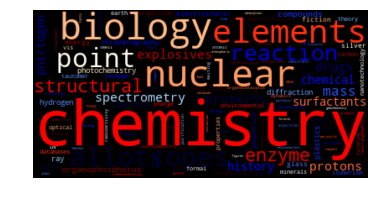

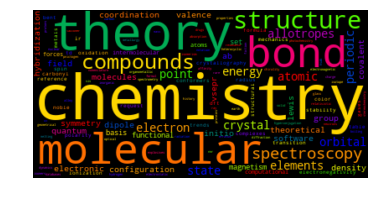

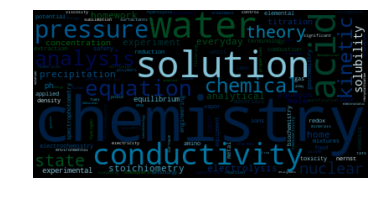

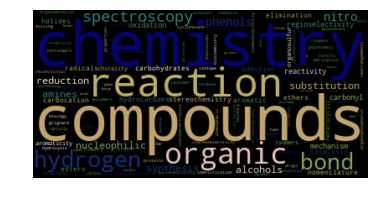

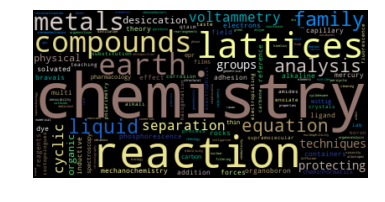

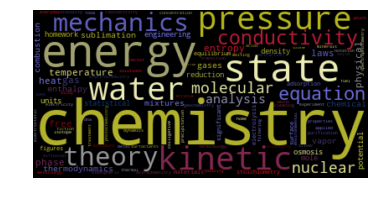

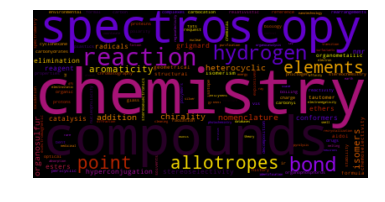

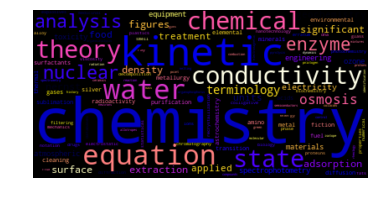

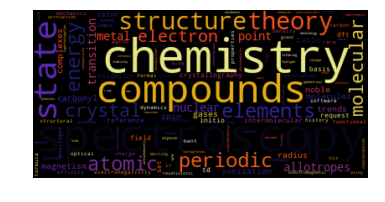

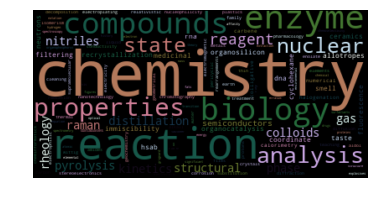

In [299]:
cmaps = cycle([
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])

for i in range(10):
    col = next(cmaps);
    display_cloud(i, col)


In [157]:
from bs4 import BeautifulSoup

In [162]:
from nltk.corpus import stopwords

In [174]:
def body_cleaner(body):
    '''
    Clean and preprocess a body text.
    
    1. Remove HTML tags
    2. Use regex to remove \n
    3. Use regex to remove all punctuation (only keep letters)
    3. Make strings to lower case and tokenize / word split reviews
    4. Remove English stopwords
    5. Rejoin to one string
    '''
    
    #1. Remove HTML tags
    body = BeautifulSoup(body).text
    
    #2. Use regex to remove \n
    body = body.replace("\n","")
    
    #3. Remove punctuation
    body = re.sub("[^a-zA-Z]", " ", body)
    
    #4. Tokenize into words (all lower case)
    body = body.lower().split()
    
    #5. Remove stopwords
    eng_stopwords = set(stopwords.words("english"))
    body = [w for w in body if not w in eng_stopwords]
    
    #6. Remove one-character
    body = [w for w in body if not len(w) == 1]
    #6. Join the body to one sentence
#     body = ' '.join(body)

    return(body)

In [164]:
example = biology.iloc[0].Body
example

'<p>In prokaryotic translation, how critical for efficient translation is the location of the ribosome binding site, relative to the start codon?</p>\n\n<p>Ideally, it is supposed to be -7b away from the start. How about if it is -9 bases away or even more? Will this have an observable effect on translation?</p>\n'

In [175]:
body_cleaner(example)

['prokaryotic',
 'translation',
 'critical',
 'efficient',
 'translation',
 'location',
 'ribosome',
 'binding',
 'site',
 'relative',
 'start',
 'codon',
 'ideally',
 'supposed',
 'away',
 'start',
 'bases',
 'away',
 'even',
 'observable',
 'effect',
 'translation']